In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
from sqlalchemy import create_engine, func

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
Base = automap_base()
Base.prepare(engine, reflect=True)
Base.classes.keys()

['measurement', 'station']

In [6]:
Measure = Base.classes.measurement
Station = Base.classes.station
session = Session(engine)

In [7]:
# reflect an existing database into a new model
first_row = session.query(Measure).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x2a609d7fb70>,
 'tobs': 65.0,
 'date': '2010-01-01',
 'id': 1,
 'prcp': 0.08,
 'station': 'USC00519397'}

In [8]:
first_rowd = session.query(Station).first()
first_rowd.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x2a609dc4358>,
 'longitude': -157.8168,
 'name': 'WAIKIKI 717.2, HI US',
 'station': 'USC00519397',
 'elevation': 3.0,
 'latitude': 21.2716,
 'id': 1}

In [9]:
# reflect the tables
measurement_cols = Measure.__table__.columns.keys()
print(measurement_cols)
station_cols = Station.__table__.columns.keys()
print(station_cols)

['id', 'station', 'date', 'prcp', 'tobs']
['id', 'station', 'name', 'latitude', 'longitude', 'elevation']


In [10]:
inspector = inspect(engine)
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [11]:
measurement_query = session.query(
    Measure.id, Measure.station, Measure.date, Measure.prcp, Measure.tobs
    )\
        .all()
measurement_df = pd.DataFrame(data=measurement_query, columns=measurement_cols)

In [12]:
measurement_df.tail()

,id,station,date,prcp,tobs
19545,19546,USC00516128,2017-08-19,0.09,71.0
19546,19547,USC00516128,2017-08-20,NaN,78.0
19547,19548,USC00516128,2017-08-21,0.56,76.0
19548,19549,USC00516128,2017-08-22,0.50,76.0
19549,19550,USC00516128,2017-08-23,0.45,76.0


In [13]:
station_query = session.query(
    Station.longitude, Station.name, Station.id, Station.elevation, Station.latitude, Station.station
    )\
        .all()
station_df = pd.DataFrame(data=station_query, columns=station_cols)

In [14]:
station_df.head()

,id,station,name,latitude,longitude,elevation
0,-157.8168,"WAIKIKI 717.2, HI US",1,3.0,21.2716,USC00519397
1,-157.8015,"KANEOHE 838.1, HI US",2,14.6,21.4234,USC00513117
2,-157.8374,"KUALOA RANCH HEADQUARTERS 886.9, HI US",3,7.0,21.5213,USC00514830
3,-157.9751,"PEARL CITY, HI US",4,11.9,21.3934,USC00517948
4,-158.0111,"UPPER WAHIAWA 874.3, HI US",5,306.6,21.4992,USC00518838


In [15]:
# We can view all of the classes that automap found


In [16]:
# Save references to each table


In [17]:
# Create our session (link) from Python to the DB


# Exploratory Climate Analysis

In [31]:
# Calculate the date 1 year ago from the last data point in the database
previous_year = (dt.date(2017, 8, 23) - dt.timedelta(days=365))
previous_year

# .str - dt.timedelta(days=365)

datetime.date(2016, 8, 23)

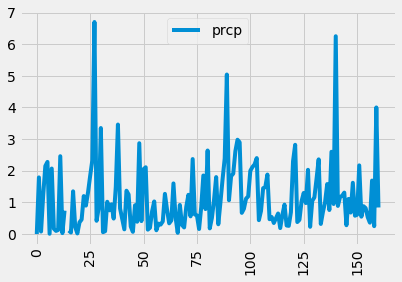

In [47]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
preceip_averages = session.query(Measure.prcp, Measure.date)\
    .filter(Measure.date >= '2016-08-23')\
    .filter(Measure.date <= '2017-08-23')\
    .group_by(Measure.prcp)\
    .order_by(Measure.date).all()
pp_df = pd.DataFrame(preceip_averages)
    
pp_df.plot(rot=90)

In [43]:
pp_df.head()

,prcp,date
0,0.00,2016-08-23
1,1.79,2016-08-23
2,0.08,2016-08-24
3,1.22,2016-08-24
4,2.15,2016-08-24


In [45]:
# Save the query results as a Pandas DataFrame and set the index to the date column
pp_df.head()
pp_df.set_index(pp_df["date"], inplace=True)

Text(0, 0.5, 'inches')

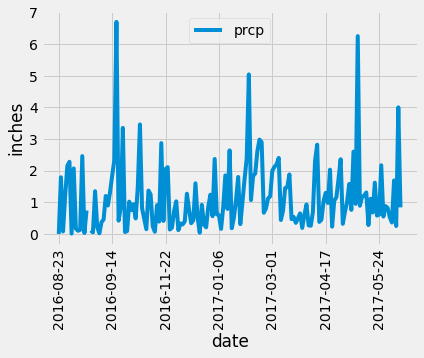

In [46]:
pp_df.plot(rot=90)
plt.ylabel('inches')

In [ ]:
# Perform a query to retrieve the data and precipitation scores

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data

In [21]:
# Use Pandas to calcualte the summary statistics for the precipitation data
pp_df.describe()

,prcp
count,131.000000
mean,0.994198
std,0.985932
min,0.000000
25%,0.325000
50%,0.690000
75%,1.335000
max,6.250000


In [22]:
# Design a query to show how many stations are available in this dataset?
station_count = session.query(Station).distinct(Station.station).count()
station_count

9

In [23]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
active = session.query(Measure.station, func.count(Measure.station))\
    .group_by(Measure.station)\
    .order_by(func.count(Measure.station).desc()).all()
active

# SELECT DISTINCT last_name, COUNT(last_name) AS "How many employees share their last name"
# FROM "Employee"
# GROUP BY last_name
# order by "How many employees share their last name" desc;

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [24]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest tempermature recorded, and average temperature of the most active station?
mostactive = session.query(Measure.station, func.max(Measure.tobs), func.min(Measure.tobs), func.avg(Measure.tobs))\
    .filter(Measure.station == 'USC00519281').all()
mostactive
    


[('USC00519281', 85.0, 54.0, 71.66378066378067)]

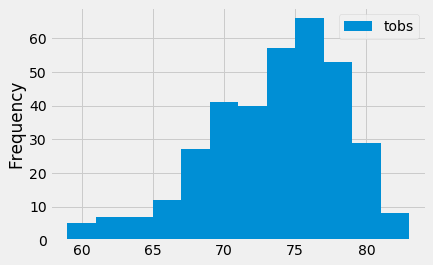

In [29]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
from pandas.plotting import table
previous_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)
mactive = session.query(Measure.tobs)\
    .filter(Measure.station == 'USC00519281')\
    .filter(Measure.date >= previous_year).all()
mactive_df = pd.DataFrame(mactive, columns=['tobs'])
mactive_df.plot.hist(bins=12)

## Bonus Challenge Assignment

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
